In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.timeseries import TimeSeries
import exoplanet as xo
import scipy
from analysis import model, log_prior, log_likelihood, negative_log_posterior, smoothListGaussian

In [7]:
# Import Light Curve
example_data = get_pkg_data_filename('../data/kplr010666592-2009131110544_slc.fits')
kepler = TimeSeries.read(example_data, format='kepler.fits', unit_parse_strict='silent')

Text(0, 0.5, 'SAP Flux (e-/s)')

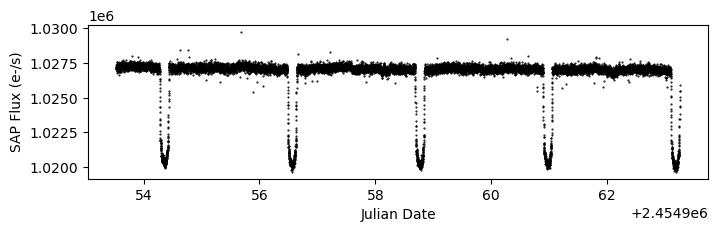

In [8]:
# Plot Data
plt.figure(figsize = (8,2))
plt.plot(kepler.time.jd, kepler['sap_flux'], 'k.', markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

4295.387595292163


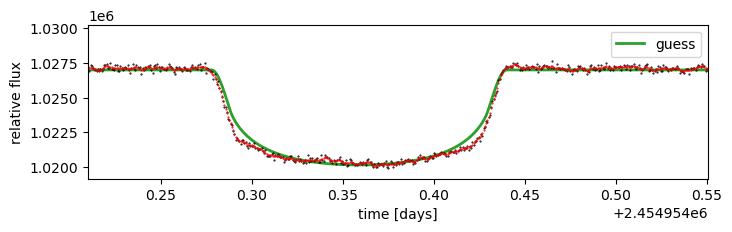

In [45]:
# Initial Guess for Model Parameters
P0 = 2.2 # period in days
T0 = 0.15 # dip length in days
phi0 = 0.69*np.pi # phase of transit
F0 = 1.027e6 # level
delta0 = 0.005 # relative dip  = (R_p/R_*)^2
x0 = (P0,T0,phi0,F0, delta0)

# boundaries for optimization
bnds = ((2.199, 2.2001), (0.14, 0.16), (0.63*np.pi, 0.7*np.pi), (1.026e6, 1.028e6), (0.004, 0.008)) 

# Remove all NaN values from Data
y = np.asarray(kepler['sap_flux'])
y = y[~np.isnan(kepler['sap_flux'])]
t = np.asarray(kepler.time.jd)
t = t[~np.isnan(kepler['sap_flux'])]
sigma_y = np.asarray(kepler['sap_flux_err'])
sigma_y = sigma_y[~np.isnan(kepler['sap_flux'])]

# Calculate Posterior for Initial model parameters
lim_l = 1000
lim_r = 1500
print(negative_log_posterior(x0, t[lim_l:lim_r], sigma_y[lim_l:lim_r], y[lim_l:lim_r]))

l_curve = model(P0, T0, phi0, F0, delta0, t=t)
#l2_curve = model(P_, T0_, phi_, F_, delta_, t=t)

plt.figure(figsize = (8,2))
plt.plot(t, l_curve, color="C2", lw=2, label = "guess")
plt.plot(t, y, 'k.', markersize=1)
plt.plot(t, smoothListGaussian(y), 'r.', markersize=1)

#plt.plot(t, l2_curve, color="C3", lw=2, label = "calc")
#plt.errorbar(t, y, sigma_y)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim( left = t[lim_l], right = t[lim_r])
plt.legend()

In [40]:
# Calculate optimized Model parameters
'''
MAP_result = scipy.optimize.minimize(
    fun=negative_log_posterior,
    x0=x0,
    args=(t[lim_l:lim_r], 10*sigma_y[lim_l:lim_r], smoothListGaussian(y[lim_l:lim_r])),
    bounds = bnds
)

P_,T0_,phi_,F_, delta_ = MAP_result.x
print("MAP results")
print("guess \t \t calc")
print(f"{P0}\t{P_}")
print(f"{T0}\t{T0_}")
print(f"{phi0}\t{phi_}")
print(f"{F0}\t{F_}")
print(f"{delta0}\t{delta_}")
'''

'\nMAP_result = scipy.optimize.minimize(\n    fun=negative_log_posterior,\n    x0=x0,\n    args=(t[lim_l:lim_r], 10*sigma_y[lim_l:lim_r], smoothListGaussian(y[lim_l:lim_r])),\n    bounds = bnds\n)\n\nP_,T0_,phi_,F_, delta_ = MAP_result.x\nprint("MAP results")\nprint("guess \t \t calc")\nprint(f"{P0}\t{P_}")\nprint(f"{T0}\t{T0_}")\nprint(f"{phi0}\t{phi_}")\nprint(f"{F0}\t{F_}")\nprint(f"{delta0}\t{delta_}")\n'

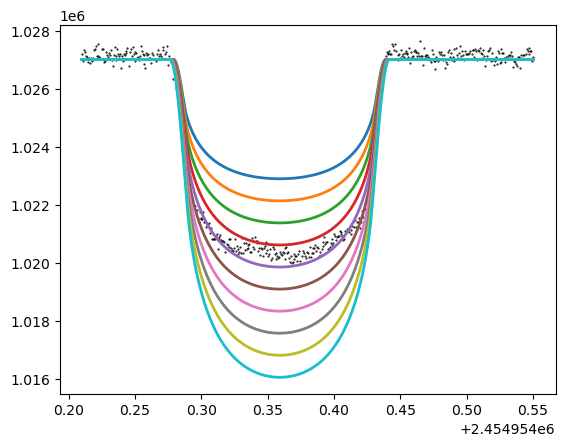

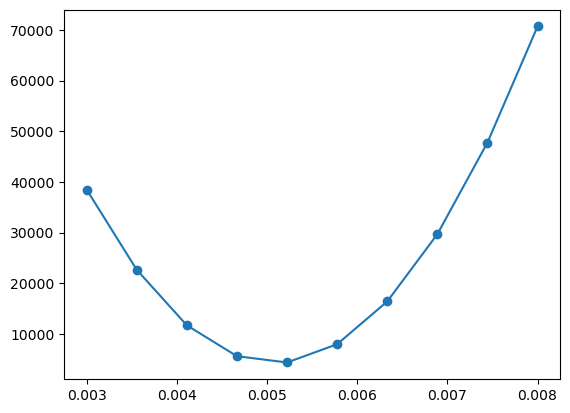

In [46]:
# Negative Log Posterior for different deltas
delta_range = np.linspace(0.003, 0.008, 10)
log_post = np.ones_like(delta_range)

plt.figure()
plt.plot(t[lim_l:lim_r], y[lim_l:lim_r], 'k.', markersize=1)
for i in range(len(delta_range)):

    plt.plot(t[lim_l:lim_r], model(P0, T0, phi0, F0, delta_range[i], t=t[lim_l:lim_r]), lw=2)

    x0 = (P0,T0,phi0,F0, delta_range[i])
    log_post[i] = negative_log_posterior(x0, t[lim_l:lim_r], sigma_y[lim_l:lim_r], y[lim_l:lim_r])

plt.figure()
plt.plot(delta_range, log_post, "o-")
